In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

68608000/68606236 [==============================] - 3s 0us/step


In [ ]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [ ]:
train_cats_dir = os.path.join(train_dir, 'cats')  # 学習用の猫画像のディレクトリ
train_dogs_dir = os.path.join(train_dir, 'dogs')  # 学習用の犬画像のディレクトリ
validation_cats_dir = os.path.join(validation_dir, 'cats')  # 検証用の猫画像のディレクトリ
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # 検証用の犬画像のディレクトリ

In [ ]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [ ]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [ ]:
batch_size = 128
epochs = 30
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [ ]:
train_image_generator = ImageDataGenerator(
                          rescale=1./255,
                          rotation_range=45,
                          width_shift_range=.15,
                          height_shift_range=.15,
                          horizontal_flip=True,
                          zoom_range=0.5) # 学習データのジェネレータ
validation_image_generator = ImageDataGenerator(rescale=1./255) # 検証データのジェネレータ

In [ ]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 2000 images belonging to 2 classes.


In [ ]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 1000 images belonging to 2 classes.


In [ ]:
sample_training_images, _ = next(train_data_gen)

In [ ]:
# この関数は、1行5列のグリッド形式で画像をプロットし、画像は各列に配置されます。
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

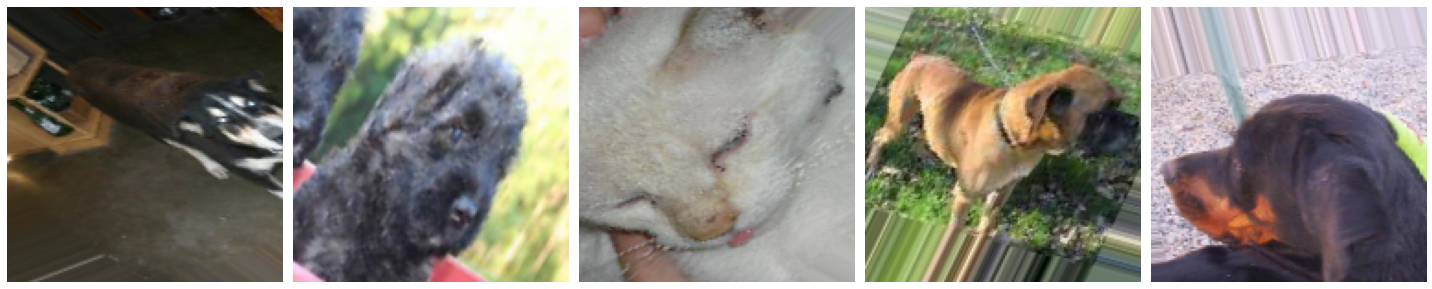

In [ ]:
plotImages(sample_training_images[:5])

In [ ]:
shallow_model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
shallow_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
shallow_history = shallow_model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/30
15/15 [==============================] - 43s 3s/step - loss: 11.1771 - accuracy: 0.5043 - val_loss: 1.9613 - val_accuracy: 0.4978
Epoch 2/30
15/15 [==============================] - 44s 3s/step - loss: 0.9349 - accuracy: 0.4909 - val_loss: 0.7026 - val_accuracy: 0.5234
Epoch 3/30
15/15 [==============================] - 42s 3s/step - loss: 0.7212 - accuracy: 0.5326 - val_loss: 0.6789 - val_accuracy: 0.5022
Epoch 4/30
15/15 [==============================] - 42s 3s/step - loss: 0.6836 - accuracy: 0.5240 - val_loss: 0.6589 - val_accuracy: 0.6004
Epoch 5/30
15/15 [==============================] - 42s 3s/step - loss: 0.6675 - accuracy: 0.5823 - val_loss: 0.6612 - val_accuracy: 0.5391
Epoch 6/30
15/15 [==============================] - 45s 3s/step - loss: 0.6652 - accuracy: 0.5694 - val_loss: 0.6463 - val_accuracy: 0.5949
Epoch 7/30
15/15 [==============================] - 43s 3s/step - loss: 0.6607 - accuracy: 0.5700 - val_loss: 0.6421 - val_accuracy: 0.6038
Epoch 8/30
15/15 [=

In [ ]:
deep_model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(256, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
deep_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = deep_model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/30
15/15 [==============================] - 61s 4s/step - loss: 0.7001 - accuracy: 0.5048 - val_loss: 0.6933 - val_accuracy: 0.4967
Epoch 2/30
15/15 [==============================] - 59s 4s/step - loss: 0.6925 - accuracy: 0.5304 - val_loss: 0.6908 - val_accuracy: 0.5469
Epoch 3/30
15/15 [==============================] - 59s 4s/step - loss: 0.6882 - accuracy: 0.5491 - val_loss: 0.6667 - val_accuracy: 0.6071
Epoch 4/30
15/15 [==============================] - 59s 4s/step - loss: 0.6912 - accuracy: 0.5278 - val_loss: 0.6722 - val_accuracy: 0.6228
Epoch 5/30
15/15 [==============================] - 59s 4s/step - loss: 0.6787 - accuracy: 0.5705 - val_loss: 0.6510 - val_accuracy: 0.6384
Epoch 6/30
15/15 [==============================] - 59s 4s/step - loss: 0.6647 - accuracy: 0.5983 - val_loss: 0.6372 - val_accuracy: 0.6384
Epoch 7/30
15/15 [==============================] - 59s 4s/step - loss: 0.6638 - accuracy: 0.5951 - val_loss: 0.6475 - val_accuracy: 0.6317
Epoch 8/30
15/15 [==